In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import math
import time

C:\Users\Franky\Anaconda3\envs\AI\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Variable
Input_Size = 1
Hidden_Size = 3
Output_Size = 1

# Genetic Algorithm Parameter
Population = 30
Mutation_Rate = 0.025

In [3]:
# Create Dataset
X = np.linspace(-1, 1, 300, dtype=np.float64)[:, np.newaxis]
Noise = np.random.normal(0, 0.05, X.shape).astype(np.float32)
Y = np.square(X) - 0.5 + Noise

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

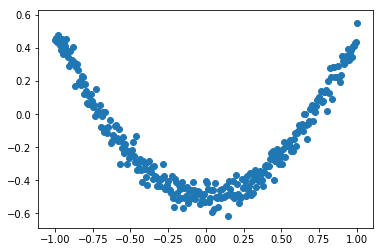

In [4]:
# Plot the Graph
plt.scatter(X, Y, alpha = 1)
plt.show()

In [5]:
def Neural_Network_Layer(List_Population):
    # Feed Forward 
    
    Weight_1 = tf.Variable(List_Population[0])
    Weight_2 = tf.Variable(List_Population[1])
    Biase_1 = tf.Variable(List_Population[2])
    Biase_2 = tf.Variable(List_Population[3])
    
    z1 = tf.matmul(X_train, Weight_1) + Biase_1
    a1 = tf.nn.relu(z1)
    z2 = tf.matmul(z1, Weight_2) + Biase_2
    
    Loss = tf.reduce_mean(tf.square(z2 - Y_train))
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    Cost = sess.run(Loss)
    
    return Cost

In [6]:
def Create_Population():
    List_Population = []
    Temp = []
    
    for i in range(Population):
        Weight_1 = np.random.randn(Input_Size, Hidden_Size)
        Weight_2 = np.random.randn(Hidden_Size, Output_Size)
        Biase_1 = np.random.randn(1, Hidden_Size)
        Biase_2 = np.random.randn(1, Output_Size)
        Temp = [Weight_1, Weight_2, Biase_1, Biase_2]
        List_Population.append(Temp)
    
    return List_Population

In [7]:
def Natural_Selection():
    Mating_Pool = []
    Num_Elements = 100
    
    Z = [A for _,A in sorted(zip(Fitness_Score,List_Population), reverse = True)]
    W = [B for B,_ in sorted(zip(Fitness_Score,List_Population), reverse = True)]
    
    for i in range(len(List_Population)):
        for j in range(1, (i + 1) * 2):
            Mating_Pool.append(Z[i])
            
    Fittest_Index = W.index(min(W))
    Current_Fittest_Child = Z[Fittest_Index]
    Current_Fitness_Score = min(W)
#     print('Current Fittest Child :', Current_Fittest_Child)
    print('Cost on Testing Set :', Current_Fitness_Score)
    
    return Mating_Pool, Current_Fitness_Score, Current_Fittest_Child

In [8]:
def Generate():
    for i in range(Population):
        A = math.floor(random.randint(0, len(Mating_Pool) - 1))
        B = math.floor(random.randint(0, len(Mating_Pool) - 1))
        PartnerA = Mating_Pool[A]
        PartnerB = Mating_Pool[B]
        Child = Crossover(PartnerA, PartnerB)
        Child = Mutation(Child)
        List_Population[i] = Child
        
#         print('Parent A :', PartnerA)
#         print('Parent B :', PartnerB)
#         print('Child :', Child)
    
    return List_Population

In [9]:
def Mutation(Child):
    
    Mutation = {'Weight_1': np.random.randn(Input_Size, Hidden_Size),
                'Weight_2': np.random.randn(Hidden_Size, Output_Size),
                'Biase_1': np.random.randn(1, Hidden_Size),
                'Biase_2': np.random.randn(1, Output_Size)}
    
    for i in range(4):
        if random.uniform(0,1) < Mutation_Rate:
            if i == 0:
                Child[i] = Mutation['Weight_1']
                print('Mutation Done on Parameter' , i)
            elif i == 1:
                Child[i] = Mutation['Weight_2']
                print('Mutation Done on Parameter' , i)
            elif i == 2:
                Child[i] = Mutation['Biase_1']
                print('Mutation Done on Parameter' , i)
            elif i == 3:
                Child[i] = Mutation['Biase_2']
                print('Mutation Done on Parameter' , i)
            
            
    return Child

In [10]:
def Crossover(PartnerA, PartnerB):
    Child = []
    
    Midpoint = math.floor(random.randint(0, (4 - 1)))
    
    for i in range(4):
        if i > Midpoint:
            Child.append(PartnerA[i])
        else:
            Child.append(PartnerB[i])
            
    return Child

In [11]:
if __name__ == '__main__':
    
    # Training
    Current_Fitness_Score = 10
    List_Population = Create_Population()
    Time_0 = time.clock()
    
    while Current_Fitness_Score > 0.2:
        Fitness_Score = []

        for i in range(Population):
            Cost = Neural_Network_Layer(List_Population[i])
            Fitness_Score.append(Cost)
        
        Mating_Pool, Current_Fitness_Score, Current_Fittest_Child = Natural_Selection()
        List_Population = Generate()
        print()
        
    print('Time Taken : ', time.clock() - Time_0)
    
    
    # Use the same parameters on testing set
    Testing_Cost = Neural_Network_Layer(Current_Fittest_Child)
    print('Cost on Testing Set :', Testing_Cost)

Cost on Testing Set : 0.1049906900666026
Mutation Done on Parameter 3

Time Taken :  5.279538151293203
Cost on Testing Set : 0.1049906900666026
